<a href="https://colab.research.google.com/github/tolossamuel/Linear-Regrassion/blob/main/day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [77]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)



In [78]:
file_path = "drive/MyDrive/jupitor/zomato.csv"

# Read the CSV file with MacRoman encoding
df = pd.read_csv(file_path, encoding='mac_roman')

# New Section

In [24]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [29]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [30]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [33]:
[features for features in df.columns if df[features].isnull().sum() > 0]

['Cuisines']

In [35]:
import seaborn as sns

<Axes: >

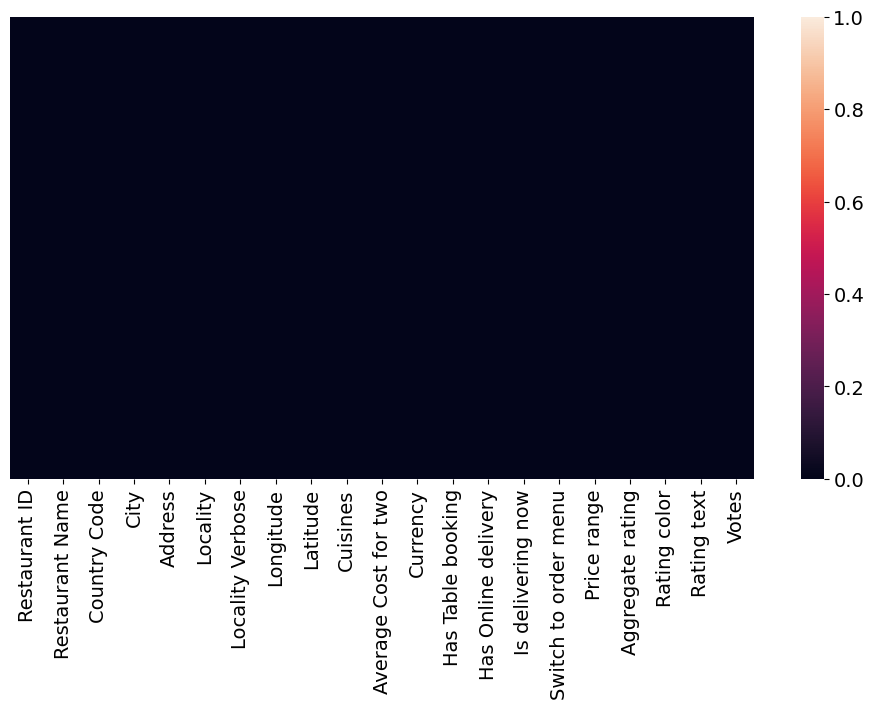

In [79]:
sns.heatmap(df.isnull(), yticklabels = False)

In [39]:
file_path = "drive/MyDrive/jupitor/Country-Code.xlsx"

# Read the CSV file with MacRoman encoding
df_country = pd.read_excel(file_path)

In [41]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [43]:
df_copy = df.copy()

In [91]:
df = pd.merge(df,df_country,on="Country Code", how = "left")

In [92]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [93]:
df.Country.value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [94]:
country = df.Country.value_counts().index
country_values = df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7d8895d77fa0>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

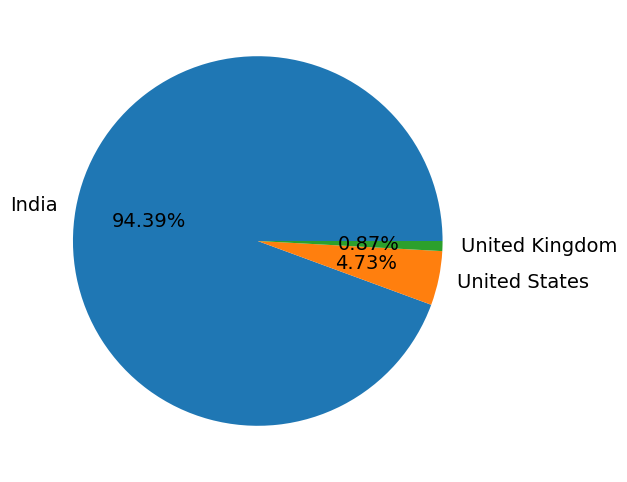

In [95]:
plt.pie(country_values[:3], labels = country[:3] ,autopct = "%1.2f%%")

In [96]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [97]:
rating = df.groupby(["Aggregate rating","Rating color","Rating text"]).size().reset_index().rename(columns = {0:"Rating count"})

In [98]:
rating.head()

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<Axes: xlabel='Aggregate rating', ylabel='Rating count'>

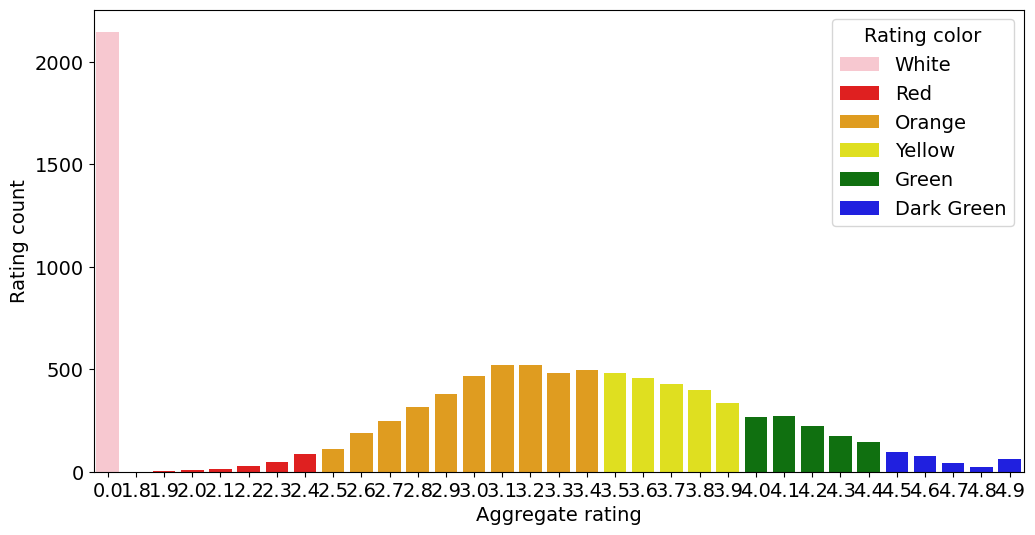

In [99]:
sns.barplot(x = "Aggregate rating", y = "Rating count",hue = "Rating color", data = rating,palette = ["pink","red","orange","yellow","green","blue"])

<ipython-input-100-4fbfb3d08afd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Rating color", data = rating, palette = ["pink","red","orange","yellow","green","blue"])


<Axes: xlabel='Rating color', ylabel='count'>

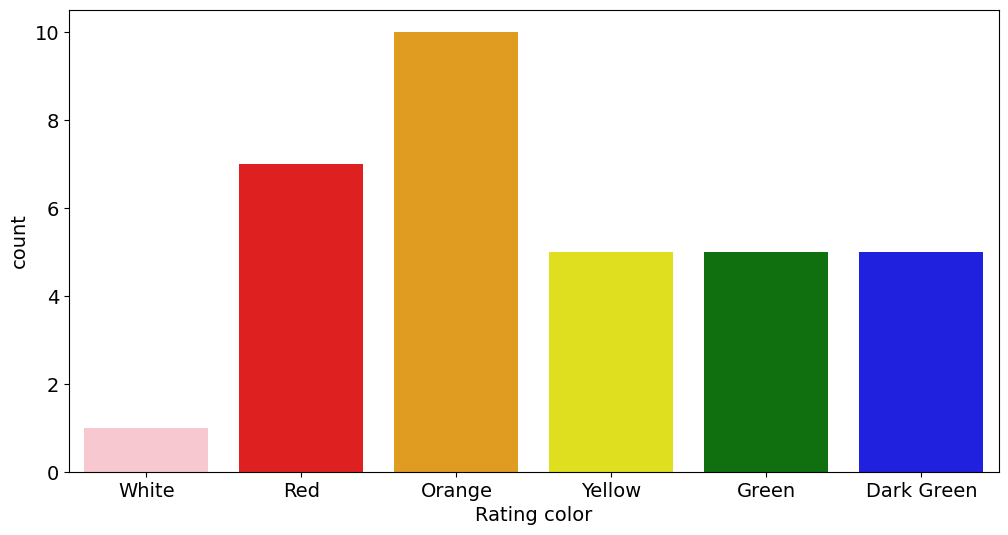

In [100]:
sns.countplot(x = "Rating color", data = rating, palette = ["pink","red","orange","yellow","green","blue"])

0       Phillipines
1       Phillipines
2       Phillipines
3       Phillipines
4       Phillipines
           ...     
9546         Turkey
9547         Turkey
9548         Turkey
9549         Turkey
9550         Turkey
Name: Country, Length: 9551, dtype: object

In [103]:
df.loc[(df["Aggregate rating"] == 0)].groupby("Country").size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [104]:
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [105]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [109]:
df.groupby(["Currency","Country"]).size().reset_index()


,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [112]:
df[["Has Online delivery"]]

,Has Online delivery
0,No
1,No
2,No
3,No
4,No
...,...
9546,No
9547,No
9548,No
9549,No


In [117]:
df.groupby(["Has Online delivery"]).size().reset_index()

,Has Online delivery,0
0,No,7100
1,Yes,2451


In [119]:
 df.groupby(["Country","Has Online delivery"]).size().reset_index()

,Country,Has Online delivery,0
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [120]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [121]:
df["City"]

0            Makati City
1            Makati City
2       Mandaluyong City
3       Mandaluyong City
4       Mandaluyong City
              ...       
9546           €¡stanbul
9547           €¡stanbul
9548           €¡stanbul
9549           €¡stanbul
9550           €¡stanbul
Name: City, Length: 9551, dtype: object

In [122]:
city = df.City.value_counts().index
city_values = df.City.value_counts().values

([<matplotlib.patches.Wedge at 0x7d8895a1f8b0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

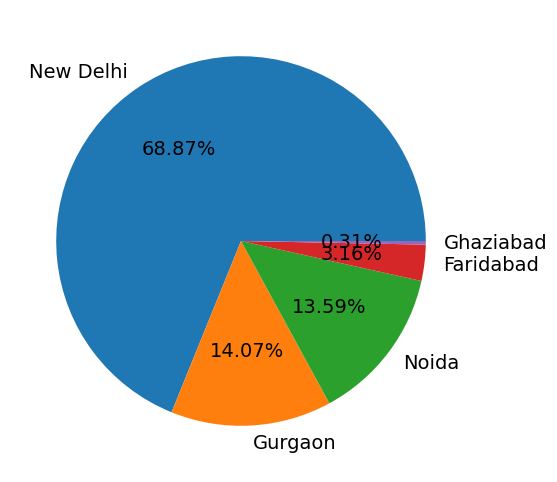

In [125]:
plt.pie(city_values[:5], labels = city[:5], autopct = "%1.2f%%")

In [126]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [132]:
df.sort_values(by = ["Aggregate rating"], ascending = False)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1381,18384115,Caterspoint,1,Gurgaon,"S-27/11, DLF Phase 3, Gurgaon",DLF Phase 3,"DLF Phase 3, Gurgaon",77.103974,28.487264,"Mexican, American, Healthy Food",...,No,Yes,No,No,2,4.9,Dark Green,Excellent,223,India
589,18269368,AB's Absolute Barbecues,214,Dubai,"Mezzanaine Floor, Centurion Star Tower, Deira ...",Deira City Centre Area,"Deira City Centre Area, Dubai",55.328740,25.254105,"Continental, Indian",...,Yes,No,No,No,3,4.9,Dark Green,Excellent,641,UAE
374,17580142,McGuire's Irish Pub & Brewery,216,Pensacola,"600 E Gregory Street, Pensacola, FL 32502",Pensacola,"Pensacola, Pensacola",-87.202700,30.417900,"Burger, Bar Food, Steak",...,No,No,No,No,3,4.9,Dark Green,Excellent,2238,United States
9303,18217279,Miann,148,Auckland,"57 Fort Street, Auckland Auckland CBD",Fort Street,"Fort Street, Auckland",174.768986,-36.846050,Desserts,...,No,No,No,No,1,4.9,Dark Green,Excellent,281,New Zealand
9299,7001086,Milse,148,Auckland,"The Pavilions, 27 Tyler Street, Britomart, Auc...",Britomart,"Britomart, Auckland",174.768690,-36.844188,Desserts,...,No,No,No,No,3,4.9,Dark Green,Excellent,754,New Zealand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,18481278,Mirch Masala Restaurant,1,New Delhi,"Shop 1, South Avenue Market, India Gate, New D...",India Gate,"India Gate, New Delhi",77.198163,28.608673,North Indian,...,No,No,No,No,1,0.0,White,Not rated,0,India
4033,18475283,Kashmiri Hills Wazwan,1,New Delhi,"Kasmir House, India Gate, New Delhi",India Gate,"India Gate, New Delhi",0.000000,0.000000,Kashmiri,...,No,No,No,No,1,0.0,White,Not rated,1,India
4029,18425152,New Classic Kitchen,1,New Delhi,"Shop 35, Laxmi Bai Nagar Market, INA, New Delhi",INA,"INA, New Delhi",77.209572,28.578039,"Chinese, Fast Food",...,No,No,No,No,1,0.0,White,Not rated,0,India
4025,18481317,Frugurpop- ibis New Delhi,1,New Delhi,"ibis New Delhi, Asset 9, Hospitality District,...","ibis New Delhi, Aerocity","ibis New Delhi, Aerocity, New Delhi",0.000000,0.000000,"Ice Cream, Desserts",...,No,No,No,No,1,0.0,White,Not rated,0,India
